In [62]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
url = "https://www.nytimes.com/interactive/2021/world/india-covid-cases.html"
r = requests.get(url)
soup = BeautifulSoup(r.text, "lxml")
table = soup.find("table",  class_ = "g-table super-table withchildren")
header = table.find_all('th')
Header = []
for i in header:
    header = i.text
    Header.append(header)
Header[0]="Country"
print(Header)
Covid = pd.DataFrame(columns=Header)
row = table.find_all('tr')
for i in row[1:]:
    d = i.find_all("td")
    rows = [tr.text for tr in d]
    l = len(Covid)
    Covid.loc[l] = rows


Covid


['Country', 'Cases Daily Avg.\n', 'Per 100,000\n', '14-day change\n', 'Deaths Daily Avg.\n', 'Per 100,000\n']


,Country,Cases Daily Avg.\n,"Per 100,000\n",14-day change\n,Deaths Daily Avg.\n,"Per 100,000\n"
0,IndiaIndia,336\n\t,<1\n\t,+145%\n\n,1.0\n\t,<0.01
1,Puducherry,6\n\t,<1\n\t,+43%\n\n,0\n\t,—
2,Kerala,66\n\t,<1\n\t,+76%\n\n,0.3\n\t,<0.01
3,Goa,2\n\t,<1\n\t,+60%\n\n,0\n\t,—
4,Karnataka,81\n\t,<1\n\t,+132%\n\n,0.1\n\t,<0.01
5,Ladakh,<1\n\t,<1\n\t,—\n\n,0\n\t,—
6,Himachal Pradesh,7\n\t,<1\n\t,+171%\n\n,0\n\t,—
7,Telangana,23\n\t,<1\n\t,+176%\n\n,0\n\t,—
8,Delhi,10\n\t,<1\n\t,+91%\n\n,0\n\t,—
9,Maharashtra,60\n\t,<1\n\t,+201%\n\n,0.4\n\t,<0.01


In [144]:
Covid.iloc[0]

Covid.reset_index()
a = Covid.drop(0)
a["Cases Daily Avg.\n"] = a["Cases Daily Avg.\n"].str.strip('<\n\t')
a

,Country,Cases Daily Avg.\n,"Per 100,000\n",14-day change\n,Deaths Daily Avg.\n,"Per 100,000\n"
1,Puducherry,6,<1\n\t,+43%\n\n,0\n\t,—
2,Kerala,66,<1\n\t,+76%\n\n,0.3\n\t,<0.01
3,Goa,2,<1\n\t,+60%\n\n,0\n\t,—
4,Karnataka,81,<1\n\t,+132%\n\n,0.1\n\t,<0.01
5,Ladakh,1,<1\n\t,—\n\n,0\n\t,—
6,Himachal Pradesh,7,<1\n\t,+171%\n\n,0\n\t,—
7,Telangana,23,<1\n\t,+176%\n\n,0\n\t,—
8,Delhi,10,<1\n\t,+91%\n\n,0\n\t,—
9,Maharashtra,60,<1\n\t,+201%\n\n,0.4\n\t,<0.01
10,Chandigarh,1,<1\n\t,Flat\n\n,0\n\t,—


<Axes: xlabel='Country'>

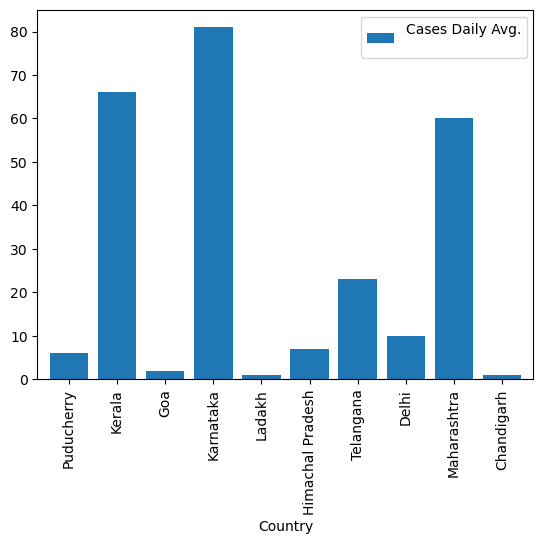

In [153]:
#a['Cases Daily Avg.\n'] = a['Cases Daily Avg.\n'].astype(int)
#a.dtypes

#x = a['Country']
#y = a['Cases Daily Avg.\n']
a.plot(kind='bar',x='Country',y='Cases Daily Avg.\n',width =0.8, )

([<matplotlib.patches.Wedge at 0x1ffa3f6fa60>,
 [Text(1.0970426414960737, 0.08060671646530027, ''),
  Text(0.6367342834850708, 0.8969779552668804, ''),
  Text(-0.23352308997425042, 1.0749264935096159, ''),
  Text(-1.0361929661442257, 0.36919390151143056, ''),
  Text(-0.86892332155854, -0.6745163165199745, ''),
  Text(-0.7989139615813301, -0.756132582283309, ''),
  Text(-0.4746746023734849, -0.9923124618090685, ''),
  Text(-0.04704861313082587, -1.098993370317795, ''),
  Text(0.7989136938905539, -0.756132865119716, ''),
  Text(1.0999178127401983, -0.013446383038501401, '')])

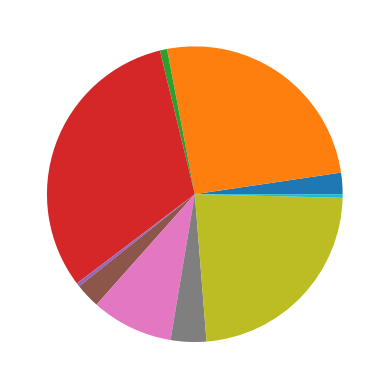

In [163]:
x=a['Country']
y=a['Cases Daily Avg.\n']

plt.pie(y)

# Second Site

In [82]:
url = "https://coronaclusters.in/"
r = requests.get(url)
soup = BeautifulSoup(r.text, "lxml")
#print(soup.prettify())
table = soup.find("table",  class_ = "table table-striped table-bordered table-hover table-sm bg-white")
head = table.find("thead", class_="thead-light")
header = head.find_all("th")
Header = []
for i in header:
    header = i.text
    Header.append(header)
print(Header)    
a = pd.DataFrame(columns=Header)
a.set_index("State", inplace=True)
r = table.find("tbody")
row = r.find_all("tr")
for i in row[1:]:
    d = i.find_all('td')
    rows = [tr.text for tr in d]
    l = len(a)
    a.loc[l] = rows
    
a['Total Cases']=a["Total Cases"].str.strip('   \n    ')
a['New Cases']=a["New Cases"].str.strip('   \n    ')
a['Total Deaths']=a["Total Deaths"].str.strip('   \n    ')
a['New Deaths']=a["New Deaths"].str.strip('   \n    ')
a['Total Recovered']=a["Total Recovered"].str.strip('   \n    ')
a['Active Cases']=a["Active Cases"].str.strip('   \n    ')
a['Last Updated']=a["Last Updated"].str.strip('   \n    ')
a.reset_index(inplace=True)
a

['State', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'Active Cases', 'Last Updated']


,State,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Last Updated
0,0,3702417,12294,18743,142,3510909,172250,2021-08-13 17:57:22
1,1,2930529,1065,37007,28,2871448,22048,2021-08-13 17:57:22
2,2,1437118,27,25069,0,1411582,467,2021-08-13 17:57:22
3,3,1708965,17,22785,1,1685761,419,2021-08-13 17:57:22
4,4,652785,405,3845,3,641847,7093,2021-08-13 17:57:22
5,5,825196,14,10078,0,814934,184,2021-08-13 17:57:22
6,6,953954,11,8954,0,944820,180,2021-08-13 17:57:22
7,7,2590632,1851,34547,28,2535715,20370,2021-08-13 17:57:22
8,8,792043,7,10515,1,781434,94,2021-08-13 17:57:22
9,9,323499,77,4398,1,317872,1229,2021-08-13 17:57:22


# Site 3 

<Axes: xlabel='State'>

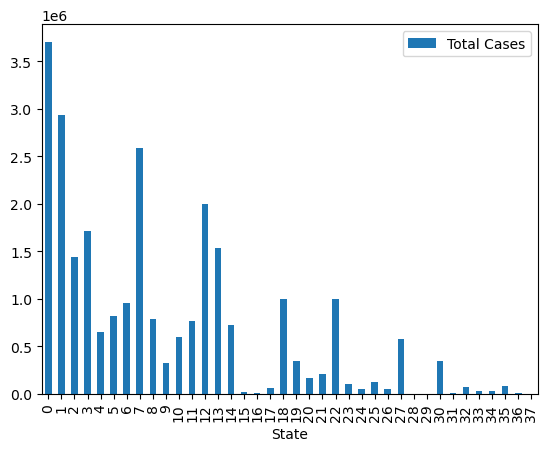